In [1]:
import sys, os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

### some convenient magics
%load_ext autoreload
%autoreload 2

In [12]:
lidardat = pd.read_csv('../../data/Lidar_timeseries.csv', 
                       header=None, 
                       names=['ua', 'ub'], 
                       delim_whitespace=True,
                      )
lidardat.index = 0.83*lidardat.index
lidardat.index.name = 'time'

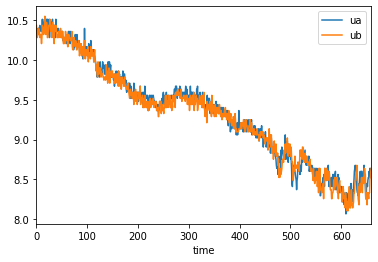

In [14]:
lidardat.plot()

In [15]:
# constants
fsamp = 0.83 # Hz
fvec = np.linspace(0, fsamp/2, 100) # frequency vector
dl = 36 # m separation distance


In [42]:
U = lidardat.mean().mean()

In [44]:
def coh_fit(f, a, b):
    return np.exp( -a * np.sqrt( (f * dl / U) ** 2.0 + (b * dl) ** 2.0) )

def residual(p, f, y):
    return y - coh_fit(f, *p)

In [46]:
import scipy.signal as sps

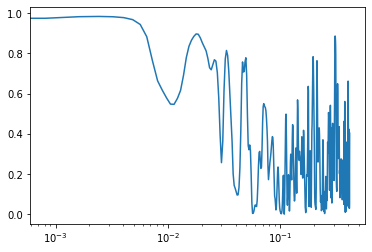

In [62]:
fcalc, coh_calc = sps.coherence(lidardat.ua, 
                                lidardat.ub, 
                                fs=fsamp,
                                nfft=1024,
                                nperseg=256,
                               )

plt.semilogx(fcalc, coh_calc)

# Initial guesses for coefficient values
from 3_08_theoretical_lidar_coherence.ipynb

In [91]:
a1=8.4
a2=0.05
b1=0.25
b2=1.24

sigma = 0.71
L = 550

a = a1*sigma/U + a2
b = b1*L**-b2

print(a,b)

0.6894147147324338 9.997473777697821e-05


[ 4.81546605e+00 -3.10940867e-04]


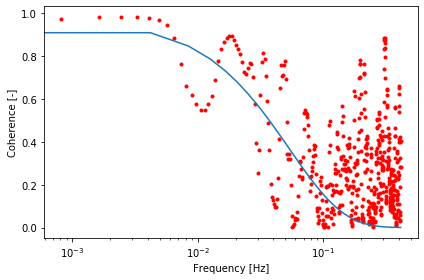

In [94]:
# initial values
p0 = [a,b]

# limit fitting to a maximum frequency
max_fit_f = 0.1 # Hz

# find corresponding index in frequency vector
max_fit_ind = np.argmin(np.abs(fcalc - max_fit_f))

# least-squares fit up to max frequency
popt, pcov = sp.optimize.leastsq(residual, 
                                 p0, 
                                 args=(fcalc[:max_fit_ind], 
                                       coh_calc[:max_fit_ind]),
                                )

# Display optimal parameter values
print(popt)

# calculate fit coherence
fit_coh = coh_fit(fvec, *popt)

plt.semilogx(fcalc, coh_calc, '.r')
plt.semilogx(fvec, fit_coh)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence [-]')

plt.tight_layout()